# Class-4 Data Visualization

## Veriye İlk Bakış

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


In [171]:
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* method: Gezegenin keşfi için kullanılan yöntemi belirten sütun. 

* number: Her bir keşfedilen gezegenin numarasını temsil eden sütun. 

* orbital_period: Keşfedilen gezegenin yörünge periyodunu (dönüş süresi) temsil eden sütun. 

* mass: Keşfedilen gezegenin kütlesini temsil eden sütun. 

* distance: Keşfedilen gezegenin Dünya'ya olan ortalama uzaklığını temsil eden sütun. 

* year: Gezegenin keşfedildiği yılı temsil eden sütun. 

In [172]:
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [173]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [175]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [176]:
df.shape

(1035, 6)

In [177]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [178]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [180]:
df.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


## Eksik Değerlerin İncelenmesi

In [189]:

df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [182]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [183]:
df["mass"].fillna(0, inplace=True) # O ile doldur

In [184]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [185]:
df["orbital_period"].fillna(df.orbital_period.mean(), inplace=True) #mean ile doldur

In [186]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [187]:
df['distance'].fillna(df['distance'].mean(), inplace=True)

In [192]:
# df.fillna(df.mean(numeric_only=True), inplace=True)

In [193]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## Katagorik Değişken Özellikleri

In [194]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [195]:
categoric_df = df.select_dtypes(include=["object"])

In [196]:
categoric_df.head(3)

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity


In [197]:
categoric_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [198]:
categoric_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [199]:
categoric_df["method"].value_counts().count()

10

<AxesSubplot:>

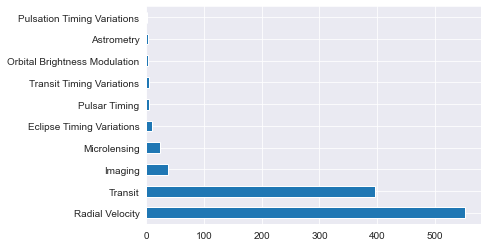

In [202]:
df["method"].value_counts().plot.barh()

## Nümerik Verilerin Özetleri

In [203]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [205]:
# numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df = df.select_dtypes(include=np.number) 

In [206]:
numeric_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [207]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [208]:
numeric_df["distance"].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [209]:
print("Ortalama: " + str(numeric_df["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(numeric_df["distance"].count())) 
print("Maksimum Değer: " + str(numeric_df["distance"].max()))
print("Minimum Değer: " + str(numeric_df["distance"].min()))
print("Medyan: " + str(numeric_df["distance"].median()))
print("Standart Sapma: " + str(numeric_df["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404421


## Dağılım Grafikleri

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [210]:

diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [211]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [212]:
df["price"].count()

53940

In [213]:
df["color"].count()

53940

In [214]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [215]:
df["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [216]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [217]:
df["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [219]:
df.shape

(53940, 10)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [221]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [222]:
df.cut.value_counts() #farklı gösterim

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [223]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [224]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [225]:
def value_count_func(df,s):
    return df[s].value_counts()
def value_count_func_ct(df,s):
    return df[s].value_counts().count()

In [226]:
for i in df.columns:
    print(value_count_func(df,i),end=(f"\n{20*'*'}\n"))

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
********************
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
********************
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
********************
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
********************
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
********************
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, 

In [227]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [244]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [245]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [246]:
from pandas.api.types import CategoricalDtype

In [247]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [248]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Very Good' < 'Fair' < 'Good' < 'Premium' < 'Ideal']

In [243]:
df=diamonds.copy()

Text(0.5, 1.0, 'Cut Değişlkeninin Sayisi')

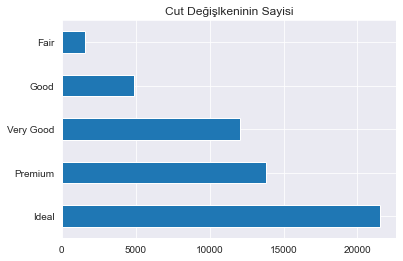

In [251]:
df.cut.value_counts().plot.barh().set_title("Cut Değişlkeninin Sayisi")

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Sayisi')

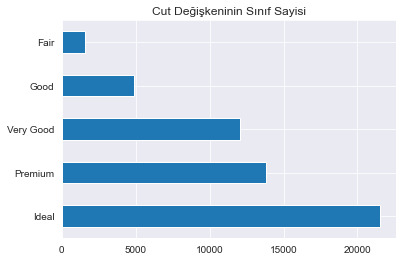

In [250]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Sayisi"))

Text(0.5, 1.0, 'Color Değişkeninin Sınıf Frekansları')

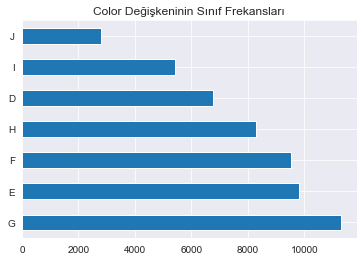

In [252]:
(df["color"]
 .value_counts()
 .plot.barh()
 .set_title("Color Değişkeninin Sınıf Frekansları"))

Text(0.5, 1.0, 'Clarity Değişkeninin Sınıf Frekansları')

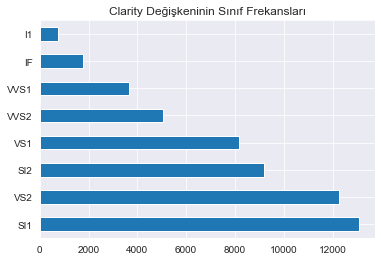

In [253]:
(df["clarity"]
 .value_counts()
 .plot.barh()
 .set_title("Clarity Değişkeninin Sınıf Frekansları"))

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Sayisi')

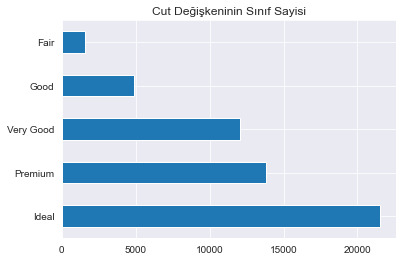

In [261]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Sayisi"))

<AxesSubplot:xlabel='cut'>

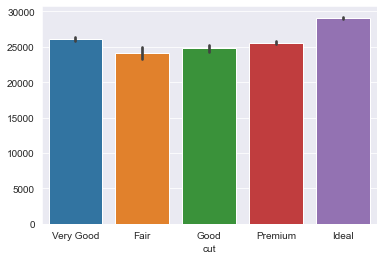

In [259]:
sns.barplot(x="cut", y=df.cut.index, data=df)

#### seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)¶

<AxesSubplot:ylabel='cut'>

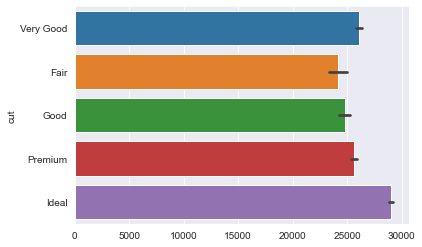

In [262]:
sns.barplot(x=df.cut.index, y="cut", data=df)

## Çapraz Gösterimler

In [263]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

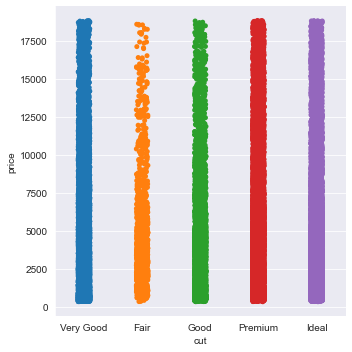

In [264]:
sns.catplot(x="cut",y="price", data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

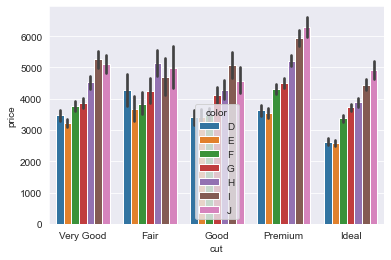

In [265]:
sns.barplot(x="cut",y="price", hue="color", data=df)

In [266]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [267]:
df.groupby(["cut","color"])["price"].describe().T

cut       Very Good                                                          \
color             D             E             F             G             H   
count   1513.000000   2400.000000   2164.000000   2299.000000   1824.000000   
mean    3470.467284   3214.652083   3778.820240   3872.753806   4535.390351   
std     3523.753268   3408.023634   3786.124033   3861.375464   4185.798202   
min      357.000000    352.000000    357.000000    354.000000    337.000000   
25%      850.000000    755.000000    905.750000    854.000000   1089.750000   
50%     2310.000000   1989.500000   2471.000000   2437.000000   3734.000000   
75%     4633.000000   4355.000000   5007.000000   5759.000000   5887.250000   
max    18542.000000  18731.000000  18777.000000  18818.000000  18803.000000   

cut                                        Fair                              \
color             I             J             D             E             F   
count   1204.000000    678.000000    163.000000    224.000000    312.000000   
mean    5255.879568   5103.513274   4291.061350   3682.312500   3827.003205   
std     4687.104775   4135.652742   3286.114238   2976.651645   3223.302685   
min      336.000000    336.000000    536.000000    337.000000    496.000000   
25%     1810.750000   1897.500000   2204.500000   1589.500000   1641.750000   
50%     3888.000000   4113.000000   3730.000000   2956.000000   3035.000000   
75%     7394.000000   7534.000000   4797.000000   4518.250000   4791.000000   
max    18500.000000  18430.000000  16386.000000  15584.000000  17995.000000   

cut    ...       Premium                                     Ideal  \
color  ...             H             I             J             D   
count  ...   2360.000000   1428.000000    808.000000   2834.000000   
mean   ...   5216.706780   5946.180672   6294.591584   2629.094566   
std    ...   4466.189717   5053.746146   4788.936691   3001.069919   
min    ...    368.000000    334.000000    363.000000    367.000000   
25%    ...   1168.250000   1697.500000   2202.750000    854.250000   
50%    ...   4511.000000   4640.000000   5063.000000   1576.000000   
75%    ...   6727.500000   8930.000000   9050.250000   3102.000000   
max    ...  18795.000000  18823.000000  18710.000000  18693.000000   

cut                                                                          \
color             E             F             G             H             I   
count   3903.000000   3826.000000   4884.000000   3115.000000   2093.000000   
mean    2597.550090   3374.939362   3720.706388   3889.334831   4451.970377   
std     2956.007149   3766.635328   4006.262468   4013.375228   4505.150405   
min      326.000000    408.000000    361.000000    357.000000    348.000000   
25%      872.000000    900.250000    891.000000    815.500000    849.000000   
50%     1437.000000   1775.000000   1857.500000   2278.000000   2659.000000   
75%     3013.500000   4121.500000   5584.500000   5606.000000   6143.000000   
max    18729.000000  18780.000000  18806.000000  18760.000000  18779.000000   

cut                  
color             J  
count    896.000000  
mean    4918.186384  
std     4476.206836  
min      340.000000  
25%     1132.500000  
50%     4096.000000  
75%     6731.500000  
max    18508.000000  

[8 rows x 35 columns]

In [268]:
df.groupby(["cut"])["price"].mean()

cut
Very Good    3981.759891
Fair         4358.757764
Good         3928.864452
Premium      4584.257704
Ideal        3457.541970
Name: price, dtype: float64

In [269]:
df.groupby(["color"])["price"].mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [270]:
df.groupby(["cut","color", "clarity"])["price"].mean()

cut        color  clarity
Very Good  D      IF         10298.260870
                  VVS1        2987.730769
                  VVS2        2615.297872
                  VS1         2955.480000
                  VS2         3145.194175
                                 ...     
Ideal      J      VS1         4734.427861
                  VS2         4867.133621
                  SI1         5115.674897
                  SI2         6555.172727
                  I1          9454.000000
Name: price, Length: 280, dtype: float64

# Histogram ve Yoğunluk

In [271]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='price', ylabel='Count'>

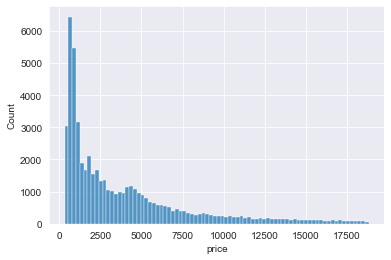

In [272]:
sns.histplot(df.price)

#### seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

<AxesSubplot:xlabel='price', ylabel='Count'>

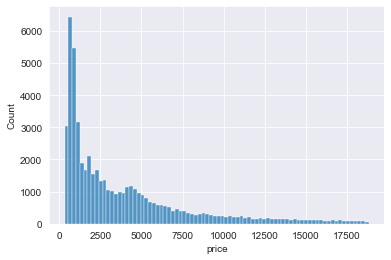

In [273]:
sns.histplot(df.price, kde=False) 

<AxesSubplot:xlabel='price', ylabel='Count'>

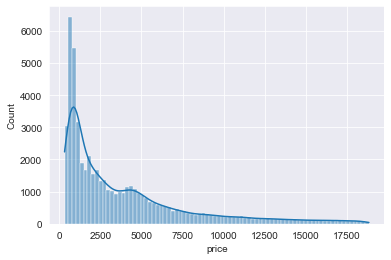

In [274]:
sns.histplot(df.price, kde=True) # kde default false

In [275]:
df["price"].describe().T

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [276]:
?sns.histplot

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

<AxesSubplot:xlabel='price', ylabel='Count'>

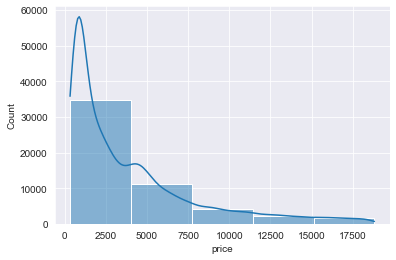

In [282]:
sns.histplot(df.price, bins=5, kde=True)
# sns.histplot(df.price, bins=25, kde=False)

# KDE

<AxesSubplot:xlabel='price', ylabel='Density'>

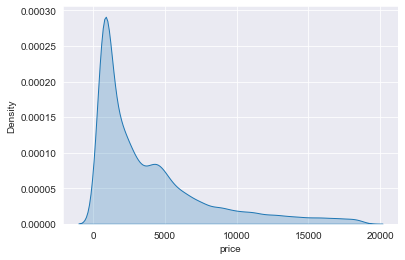

In [283]:
sns.kdeplot(df.price, shade=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

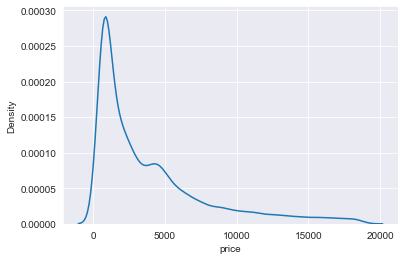

In [285]:
sns.kdeplot(df.price, shade=False)

<AxesSubplot:xlabel='price', ylabel='Density'>

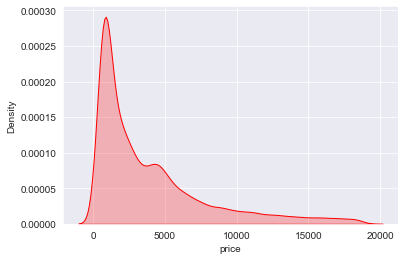

In [286]:
sns.kdeplot(df.price, shade=True, color="red") 

In [284]:
?sns.kdeplot

Signature:
sns.kdeplot(
    x=None,
    *,
    y=None,
    shade=None,
    vertical=False,
    kernel=None,
    bw=None,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cumulative=False,
    shade_lowest=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    weights=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    levels=10,
    thresh=0.05,
    bw_method='scott',
    bw_adjust=1,
    log_scale=None,
    color=None,
    fill=None,
    data=None,
    data2=None,
    warn_singular=True,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analagous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further 

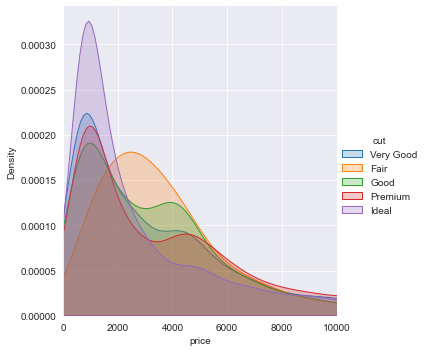

In [288]:
(sns.FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True) 
 .add_legend()
)

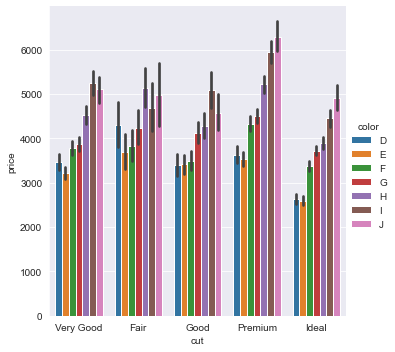

In [296]:
sns.catplot(x="cut", y="price", hue="color",kind="bar", data=df) # bar 

## Boxplot

veri setinin hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [297]:
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [298]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [299]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [300]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [301]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [302]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

Bir kutu grafiği (Boxplot), veri çeyreklerini (veya yüzdelikleri) ve ortalamaları görüntüleyerek sayısal verilerin ve değişkenliğin görsel olarak dağılımını göstermek için kullanılır. Veri analizinde sıklıkla kullanılan bir grafik türüdür.

Kutu grafikleri, bir veri kümesinin beş özelliğini gösterir: minimum değer, ilk (%25) çeyrek, medyan, üçüncü (%75) çeyrek ve maksimum değer.

Minimum Değer : Aykırı değerler hariç en düşük değer (sol ucun sonunda gösterilir).

İlk çeyrek (%25) : Skorların yüzde yirmi beşlik dilimine gelen kısmını gösterir.

Medyan : Medyan, verilerin orta noktasını işaretler ve kutuyu iki bölüme bölen çizgiyle gösterilir.

Üçüncü çeyrek (%75) : Skorların yüzde yetmiş beşlik dilimine gelen kısmını gösterir. Dolayısıyla, verilerin% 25’i bu değerin üzerindedir.

Maksimum değer : Aykırı değerler hariç en yüksek değeri gösterir.

Kutu grafikleri, araştırmacıların ortalama değerleri, veri kümesinin dağılımını ve değişkenlik belirtilerini hızlı bir şekilde tanımlamasını sağlayan verilerin görsel bir özetini sağladığı için faydalıdır.

<AxesSubplot:xlabel='total_bill'>

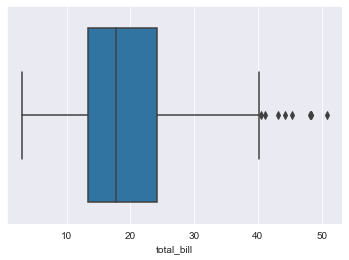

In [303]:
sns.boxplot(x=df["total_bill"])

<AxesSubplot:ylabel='total_bill'>

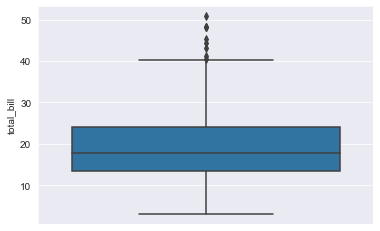

In [304]:
sns.boxplot(y=df["total_bill"])

Çapraz Gösterimler

In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<AxesSubplot:xlabel='day', ylabel='total_bill'>

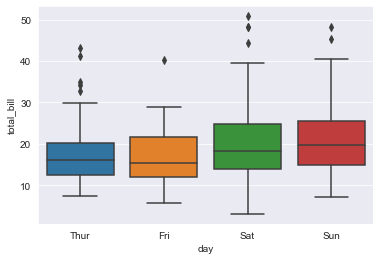

In [306]:
sns.boxplot(x="day", y="total_bill", data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

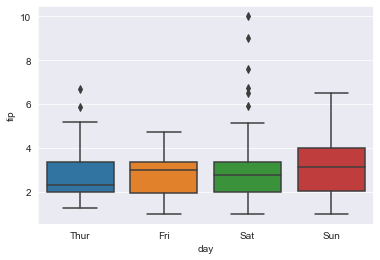

In [307]:
sns.boxplot(x="day", y="tip", data=df)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

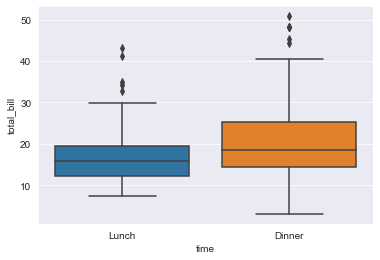

In [308]:
sns.boxplot(x="time", y="total_bill", data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

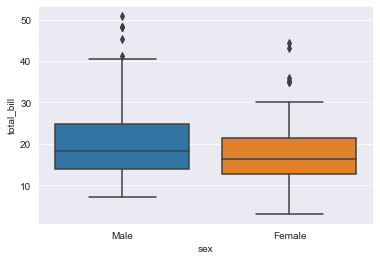

In [309]:
sns.boxplot(x="sex", y="total_bill", data=df)

<AxesSubplot:xlabel='size', ylabel='total_bill'>

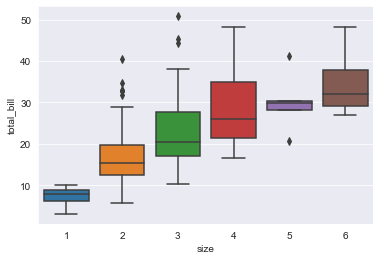

In [310]:
sns.boxplot(x="size", y="total_bill", data=df)

<AxesSubplot:xlabel='size', ylabel='tip'>

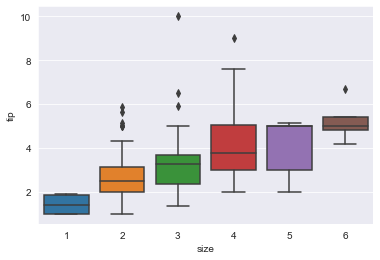

In [311]:
sns.boxplot(x="size", y="tip", data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

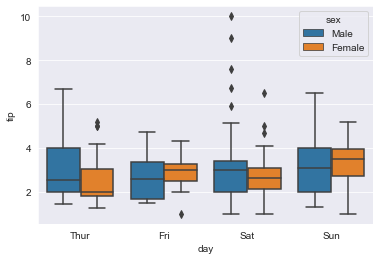

In [315]:
sns.boxplot(x="day", y="tip", hue="sex", data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

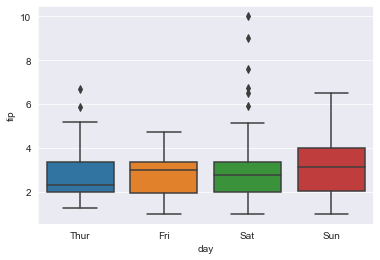

In [316]:
sns.boxplot(x="day", y="tip", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

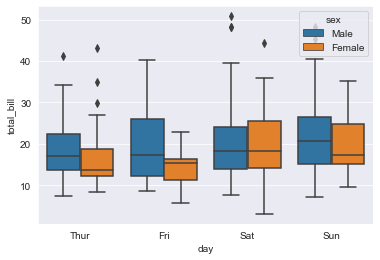

In [317]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

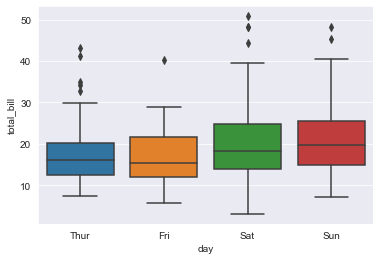

In [318]:
sns.boxplot(x="day", y="total_bill", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

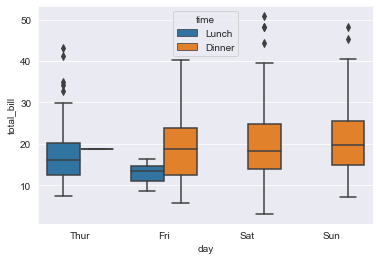

In [319]:
sns.boxplot(x="day", y="total_bill", hue="time", data=df)

## Violin

Violin plot (keman grafiği) sayısal değerler için birden fazla istatistiksel çıkarım yapmamızı sağlayan hem box plot (kutu grafiği) hem de kernel density plotun (yoğunluk grafiği) bir karışımıdır. Bununla beraber gruplar arasındaki sayısal değerlerin karşılaştırılmasında oldukça faydalıdır.
Medyan (%50 Quartile): Değişkene ait verilerin ortasında yer alan değer.
İlk Çeyreklik (%25 Quartile): Kısacası medyan ile minimumun ortasındaki değer olarak açıklanabilir.
Üçüncü Çeyreklik (%75 Quartile): Medyan ile maksimumum ortasındaki değer olarak açıklanabilir.
Çeyrekler Arası (Interquartile Range IQR): ilk ve üçüncü çeyrek arasında yer alan değerler bu aralığa girmektedir.
Maksimum: Üçüncü quartile + IQR * 1,5 = bize maksimum değerini verir.
Minimum: İlk çeyrek IQR * 1,5 = bize minimum değerini verir.
Sıradışı Veri (Outliers): Hesaplanan minimum ve maksimum değerlerin dışında kalan veriler outlier olarak nitelendirilir.
Yoğunluk: Verilerin yoğun olarak yer aldığı alanların gösterildiği yer.

In [320]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


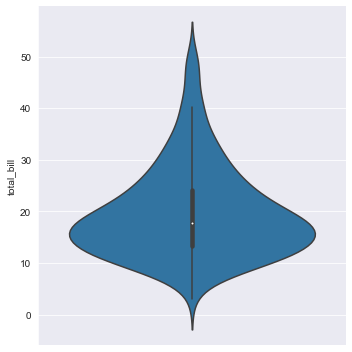

In [321]:
sns.catplot(y="total_bill", kind="violin", data=df)

<AxesSubplot:ylabel='total_bill'>

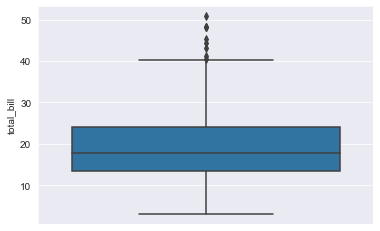

In [323]:
sns.boxplot(y="total_bill", data=df)

<AxesSubplot:ylabel='total_bill'>

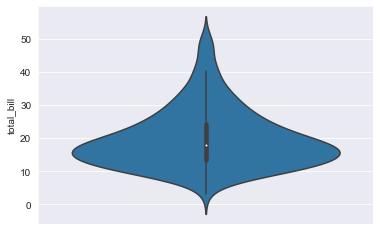

In [322]:
sns.violinplot(y="total_bill", data=df)

 Çapraz Çizimler

<AxesSubplot:xlabel='day', ylabel='total_bill'>

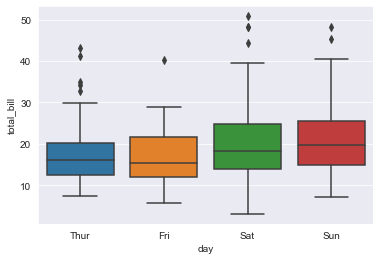

In [324]:
sns.boxplot(x="day", y="total_bill", data=df)

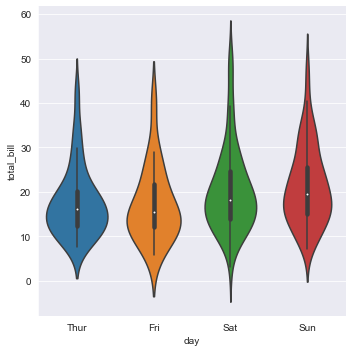

In [325]:
sns.catplot(x="day", y="total_bill", kind="violin", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

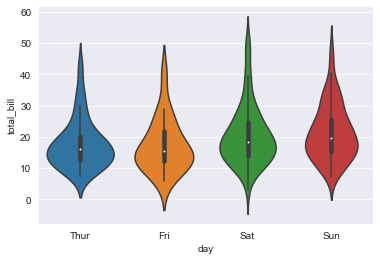

In [326]:
sns.violinplot(x="day", y="total_bill", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

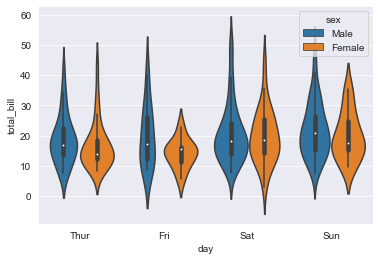

In [327]:
sns.violinplot(x="day", y="total_bill",hue="sex", data=df)

## Scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

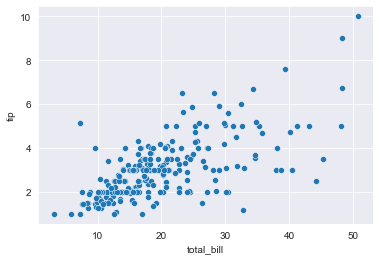

In [328]:
sns.scatterplot(x="total_bill", y="tip", data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

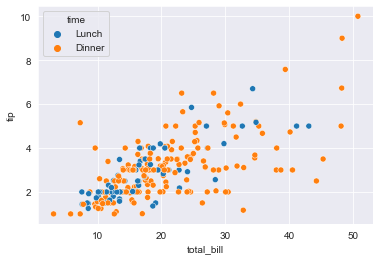

In [330]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

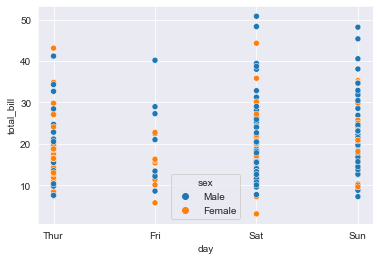

In [331]:
sns.scatterplot(x="day", y="total_bill",hue="sex", data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

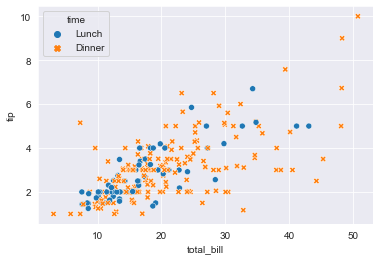

In [332]:
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=df) # style da eklendi

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

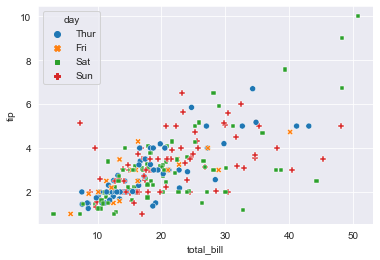

In [333]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="day", data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

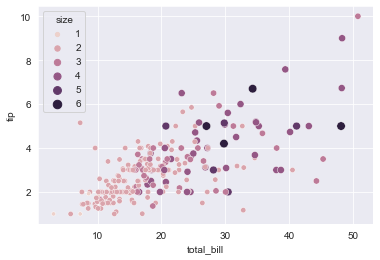

In [334]:
sns.scatterplot(x="total_bill", y="tip", hue="size",size="size", data=df)

In [335]:
import matplotlib.pyplot as plt

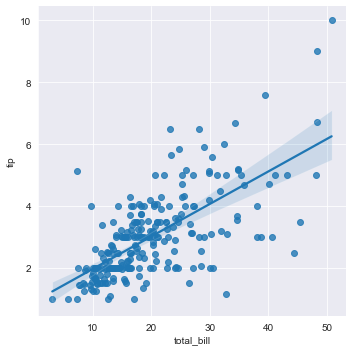

In [336]:
df=tips.copy()
sns.lmplot(x="total_bill", y="tip", data=df)
m, b = np.polyfit(df[['total_bill']], df[['tip']], 1) # Numpy'nin polyfit fonksiyonu ile eğimi ve kesme noktasını bul
plt.plot(x, m*x + b, color='red') # Doğruyu çiz


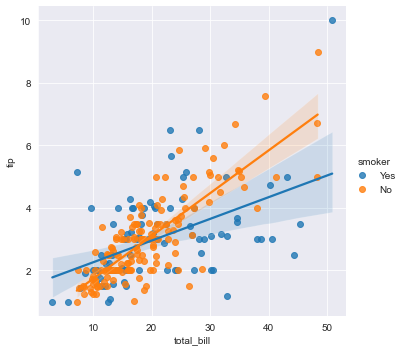

In [337]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",data=df)

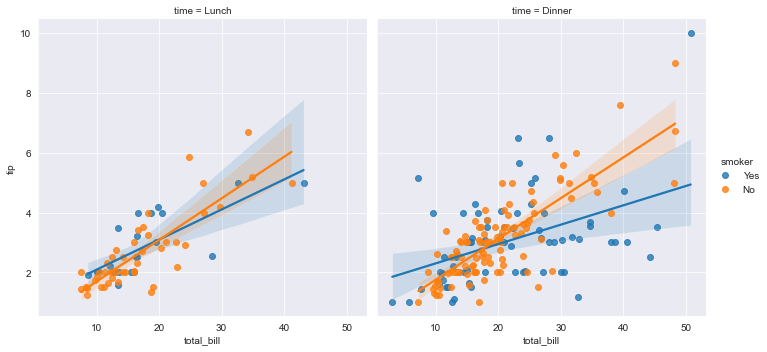

In [338]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df)

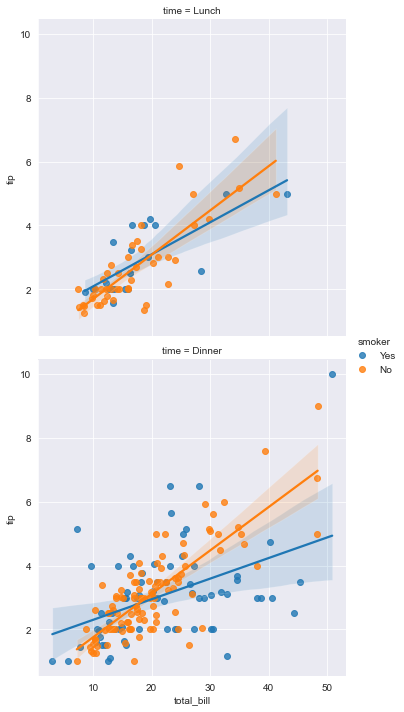

In [339]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", row="time", data=df) # row

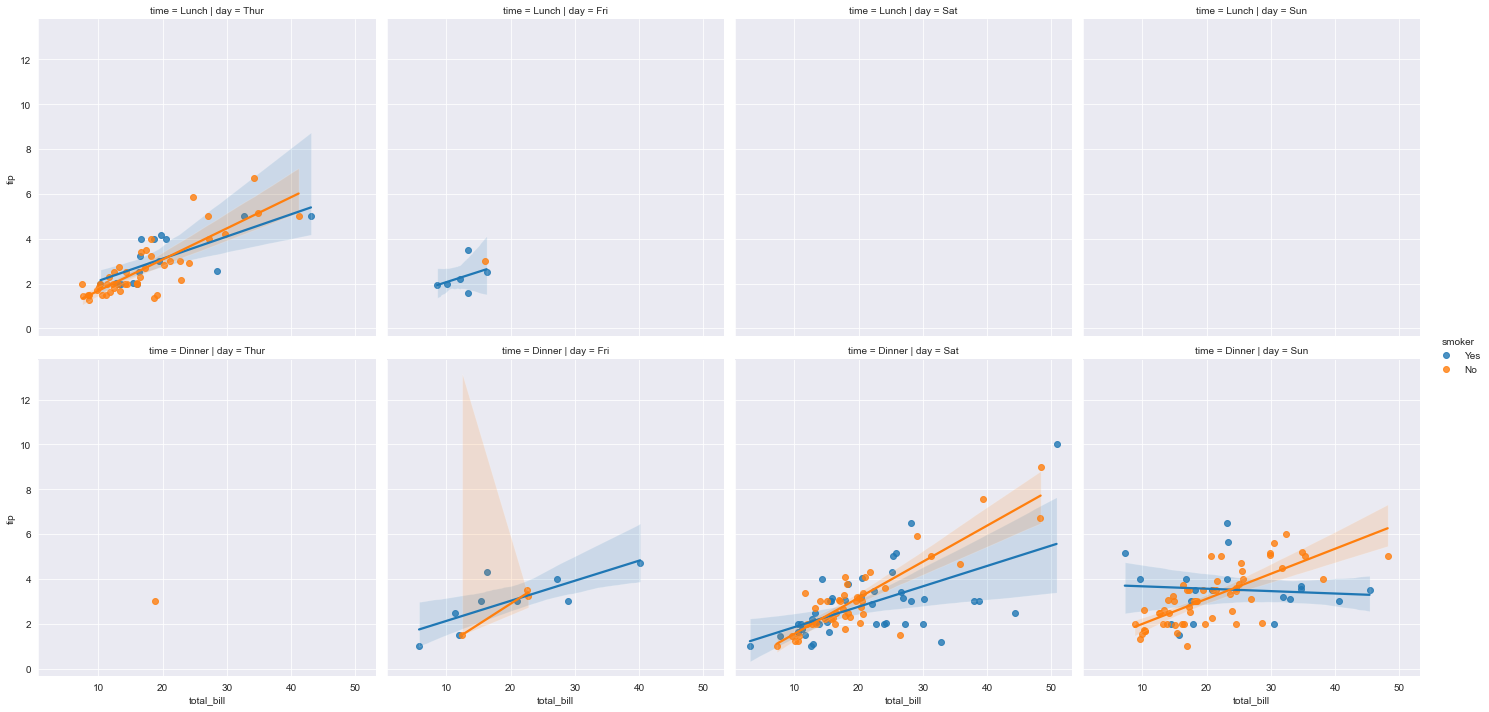

In [340]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="day", row="time", data=df)

## Scatterplot Matrisi

In [342]:
iris=sns.load_dataset("iris")
df=iris.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Sepal Length (Çanak yaprağı uzunluğu): Iris bitkisinin çanak yaprağının uzunluğunu ölçer.
* Sepal Width (Çanak yaprağı genişliği): Iris bitkisinin çanak yaprağının genişliğini ölçer.
* Petal Length (Taç yaprağı uzunluğu): Iris bitkisinin taç yaprağının uzunluğunu ölçer.
* Petal Width (Taç yaprağı genişliği): Iris bitkisinin taç yaprağının genişliğini ölçer.
* Species (Tür): Iris bitkisinin türünü belirtir. Bu sütun, Iris setosa, Iris versicolor ve Iris virginica gibi üç farklı türü içerir.

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [344]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [345]:
df.shape

(150, 5)

# pairplot

veri setindeki sayisal degiskenler arasindaki iliskileri gorsellestirmek icin kullanilir.

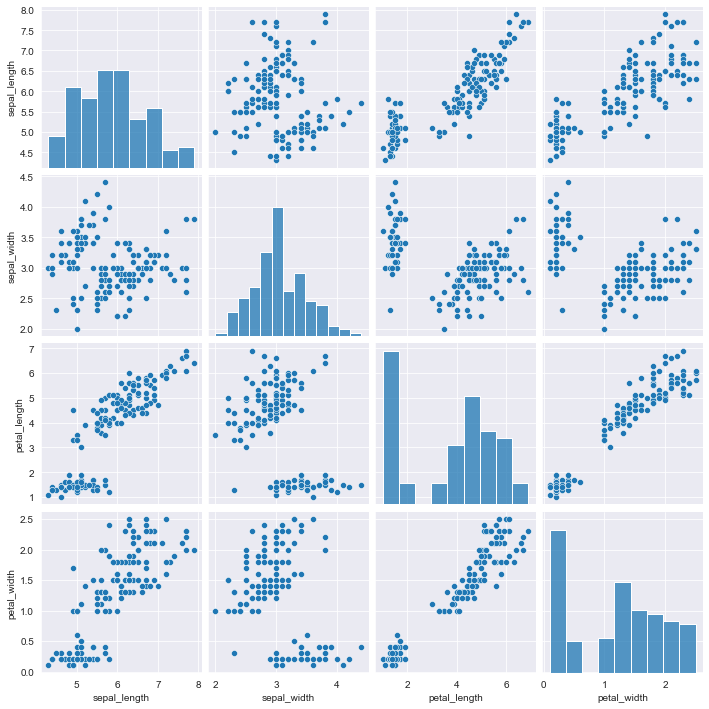

In [346]:
sns.pairplot(df)

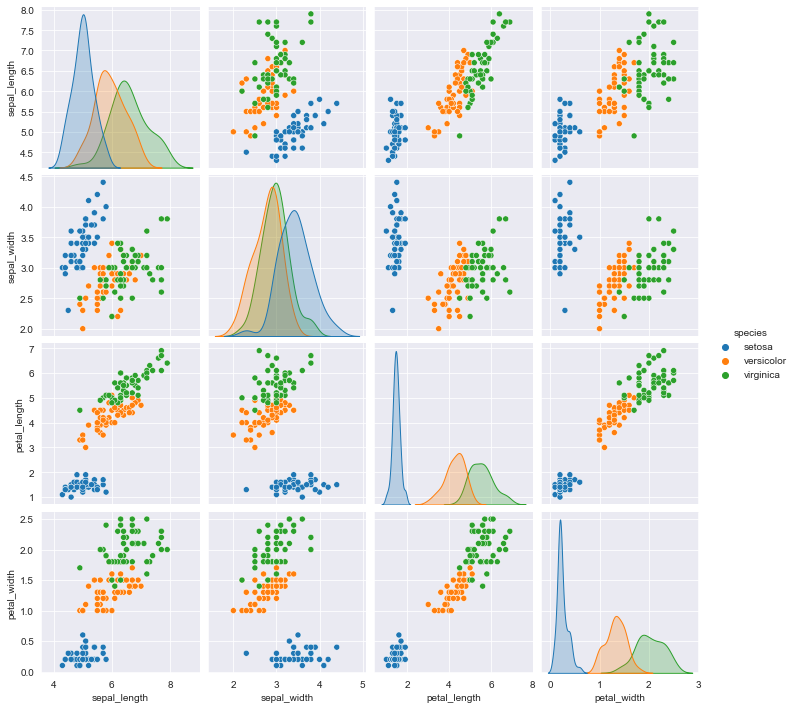

In [347]:
sns.pairplot(df, hue="species")

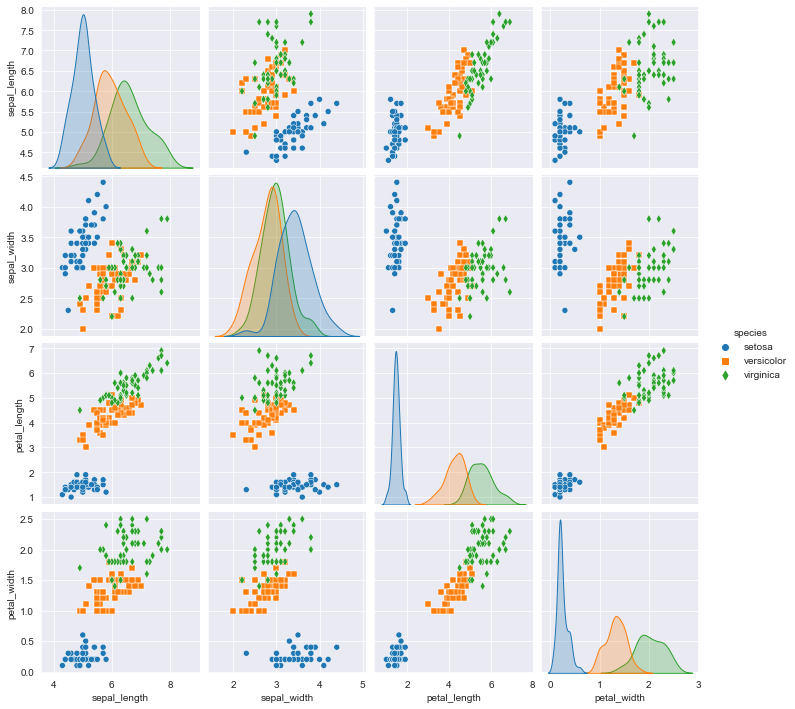

In [348]:
sns.pairplot(df, hue="species", markers=["o","s","d"])

In [350]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

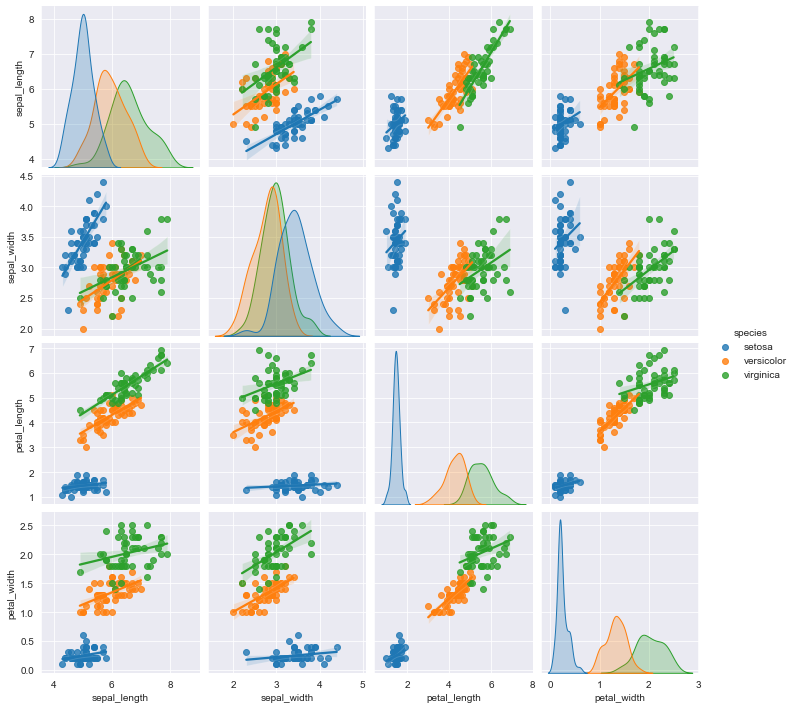

In [349]:
sns.pairplot(df, kind="reg", hue="species")

## Heatmap

In [351]:
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [352]:
df.shape

(144, 3)

In [353]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [355]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [356]:
df=df.pivot("month","year","passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

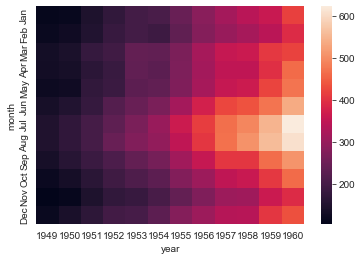

In [357]:
sns.heatmap(df)

<AxesSubplot:xlabel='year', ylabel='month'>

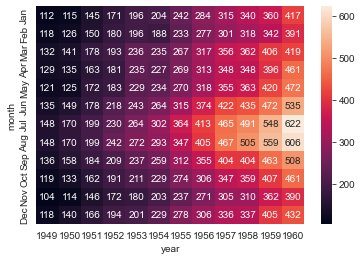

In [359]:
sns.heatmap(df, annot=True,fmt="d") # fmt="d"

<AxesSubplot:xlabel='year', ylabel='month'>

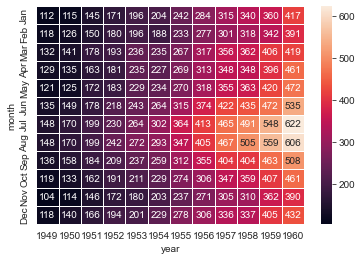

In [363]:
sns.heatmap(df, annot=True, fmt="d", linewidths=0.5)

<AxesSubplot:xlabel='year', ylabel='month'>

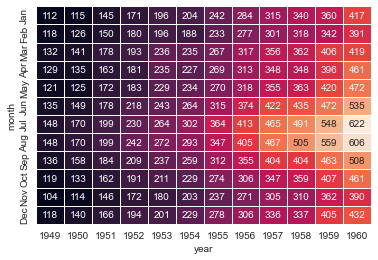

In [364]:
sns.heatmap(df, annot=True, fmt="d", linewidths=0.5, cbar=False)

## Çizgi Grafikler

In [386]:
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


* subject: Deneklerin kimliklerini temsil eden sütun.

* timepoint: Her bir ölçümün zaman noktasını temsil eden sütun. Genellikle tarama sırasında alınan zaman aralıklarını belirtir.

* event: Her bir zaman noktasındaki olayı belirten sütun. Örneğin, bir görev esnasında hangi tür uyarıcının sunulduğunu veya deneklerin hangi koşullar altında olduklarını belirtebilir.

* region: Beyin bölgesini temsil eden sütun. Beyindeki belirli bir alanın aktivitesini ölçmek için kullanılır. Bu sütun, hangi beyin bölgesinin incelendiğini belirtir.

* signal: Her bir zaman noktasındaki sinyal şiddetini temsil eden sütun. Genellikle bir beyin bölgesindeki aktiviteyi yansıtır.

In [387]:
df.shape 

(1064, 5)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [389]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [390]:
df.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [391]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [392]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

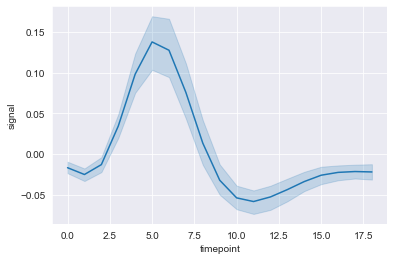

In [393]:
sns.lineplot(x="timepoint", y="signal", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

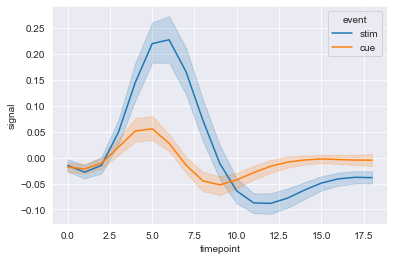

In [394]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

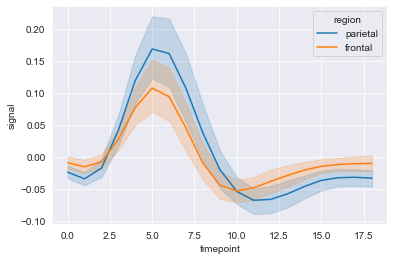

In [395]:
sns.lineplot(x="timepoint", y="signal", hue="region", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

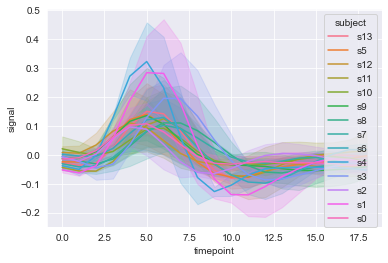

In [396]:
sns.lineplot(x="timepoint", y="signal", hue="subject", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

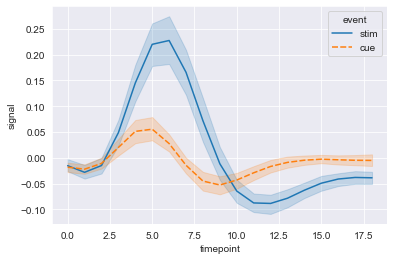

In [397]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event",data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

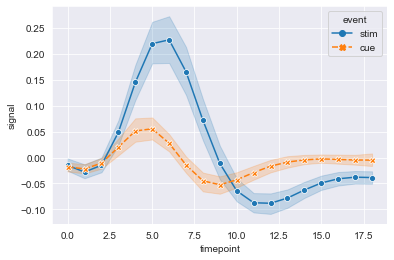

In [398]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  data = df)

In [399]:
?sns.lineplot

Signature:
sns.lineplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and 

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

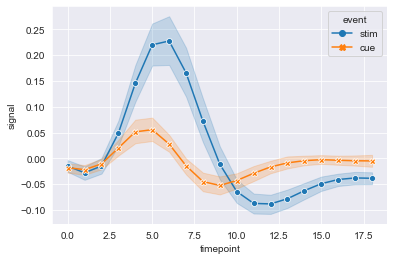

In [400]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

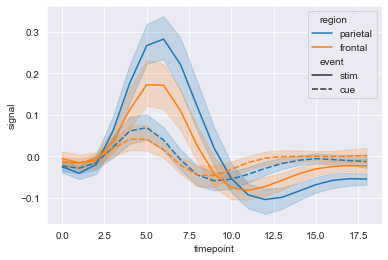

In [401]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df)

In [402]:
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
numeric_df = df.select_dtypes(include=np.number)
categoric_df = df.select_dtypes(include=['category'])

In [403]:
numeric_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [404]:
categoric_df.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
# for i in categoric_df.columns:
#     graf = sns.barplot(x=[str(i) for i in df[i].value_counts().index], y=df[i].value_counts().values.tolist(), data=df)
#     graf.set_title(f'{i} icin Grafik')
#     plt.show()

In [408]:
def bar_chart_target(df,col,target): 

    price_list=df[[col, target]].groupby([col],as_index=False).mean()[target].to_list()
    graf= sns.barplot(y=price_list ,
                      x=[str(i) for i in df[col].value_counts().index])
    graf.axhline(sum(price_list)/len(price_list))
    graf.set_title(col)
    plt.show()

In [406]:
df.groupby('cut')['price'].mean()

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

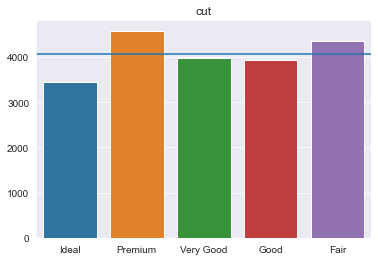

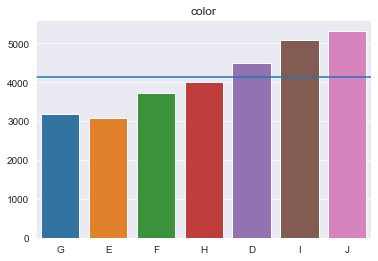

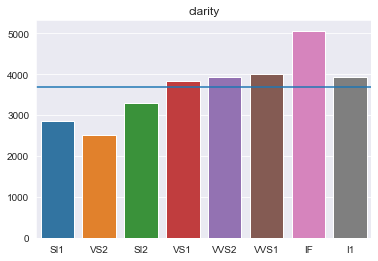

In [409]:
for i in categoric_df:
    bar_chart_target(df,i,'price')

In [410]:
numeric_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

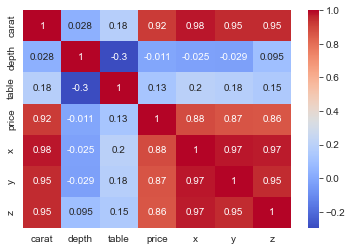

In [412]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm") #cmap="coolwarm"

<AxesSubplot:>

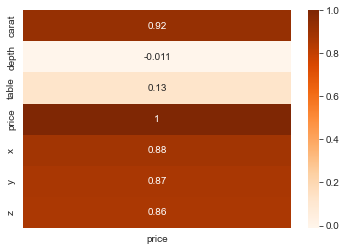

In [413]:
sns.heatmap(numeric_df.corr()[['price']], annot=True, cmap="Oranges") 

In [414]:
df=tips.copy()
numeric_df = df.select_dtypes(include=np.number)
categoric_df = df.select_dtypes(include=['category'])

<AxesSubplot:>

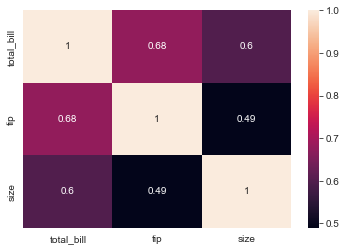

In [415]:
sns.heatmap(numeric_df.corr(), annot=True)

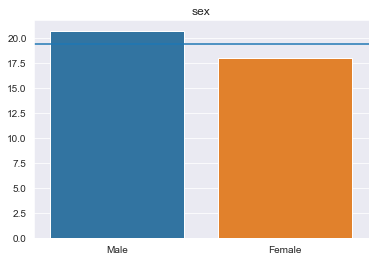

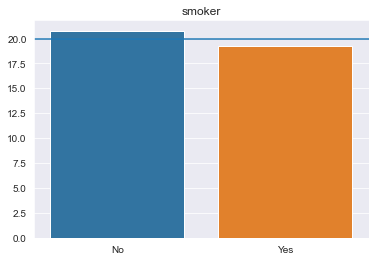

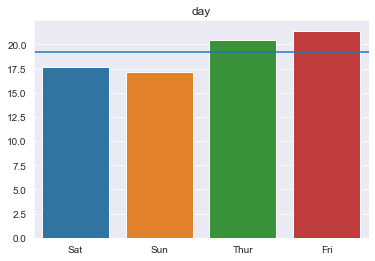

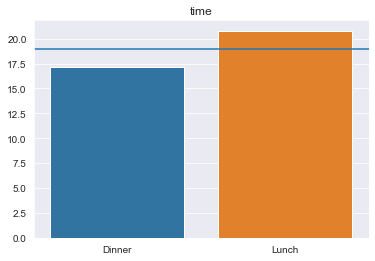

In [416]:
for i in categoric_df:
    bar_chart_target(df,i,'total_bill')

## EKSTRA Line 

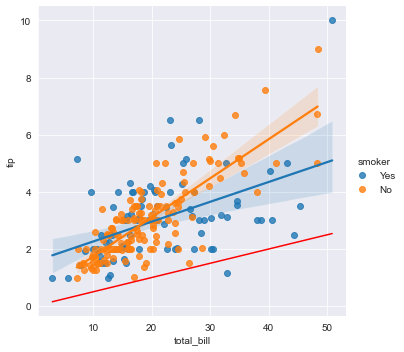

In [8]:
df = sns.load_dataset('tips')

sns.lmplot(x="total_bill", y="tip", hue="smoker",data=df)

egim = 0.05
y_konum = 0  
x_ = np.linspace(df['total_bill'].min(), df['total_bill'].max())
y_ = egim * x_ + y_konum
plt.plot(x_, y_, color='red') 
plt.show()


Kategori: _child1 - Eğim: 0.06959020374738535
Kategori: _child4 - Eğim: 0.1371559004880831


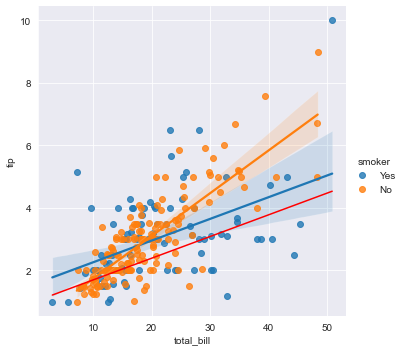

In [15]:
# lmplot taki cizgilerin egiminin bulunmasi thanksgpt
lm = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)

for ax in lm.axes.flat:
    
    for line in ax.get_lines():
        x = line.get_xdata()
        y = line.get_ydata()
        slope, intercept = np.polyfit(x, y, 1) 
        print(f"Kategori: {line.get_label()} - Eğim: {slope}")
        
egim = 0.06959020374738535
y_konum = 1  
x_ = np.linspace(df['total_bill'].min(), df['total_bill'].max())
y_ = egim * x_ + y_konum

plt.plot(x_, y_, color='red') 
plt.show()

# https://www.kaggle.com/code/tayyipgney/student-data-visualization/notebook

# https://www.kaggle.com/code/tayyipgney/plotly-datavis/notebook